# Data Mining Versuch Mobile User Analysis and Gender-Age-Group Prediction
* Autor: Prof. Dr. Johannes Maucher
* Datum: 04.10.2016

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung

## Kurzbeschreibung:

In diesem Versuch werden die im Rahmen eines Kaggle-Contest [von _TalkingData_ bereitgestellten Daten](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) analysiert. Die Daten enthalten für eine große Menge chinesischer User, Angaben zur Marke und Modell des Smartphones und zu den installierten und aktiven Apps. Ziel ist es aus den zur Verfügung stehenden Trainingsdaten ein Modell zu erlernen, das die Klassifikation der User in die jeweilige Gender-Age-Gruppe erlaubt. Für die Lösung dieser Aufgabe müssen sämtliche Schritte der Data Mining Prozesskette implementiert werden:

1. Datenbeschaffung und Zugriff
2. Datenauswahl: Welche der vorhandenen Daten sind für die gegebene Aufgabe tatsächlich relevant
3. Datenbereinigung: Wie wird mit fehlenden und fehlerhaften Daten umgegangen?
4. Datentransformation: Wie können aus den vorhandenen Daten informative Mermale gewonnen werden?
5. Modellbildung: Unüberwachtes oder überwachtes erlernen eines Modells; Clustering-, Klassifikations- oder Regressionsmodell.
6. Evaluation, Visualisierung und Interpretation der Daten/Ergebnisse

## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Daten in .csv Files
* Zugriff auf Daten in SQLite Files
* Statistische Analyse und Visualisierung von Daten
* Implementierung der oben genannten Data Mining Prozessschritte, insbesondere:

    * Feature-Engineering: Berechnung von für die gegebene Aufgabe relevanter Daten aus Rohdaten
    * Clustering (unüberwachtes Lernen) 
    * Klassifikation/Prädiktion (überwachtes Lernen) mit verschiedenen Machine Learning Verfahren
    * Evaluation von Klassifikationsverfahren

## Aufgaben zur Vorbereitung

1. Laden Sie die Daten entweder vom Skripteserver oder direkt von [Kaggle](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) herunter und versuchen Sie die Daten anhand dieser [Beschreibung](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) zu verstehen.
2. In diesem Versuch soll die Gender-Age-Group von Smartphone-Usern vorhergesagt werden. Überlegen Sie sich welche der vorhandenen Daten für diese Vorhersage relevant sein könnten.
3. Für die Vorhersage kann ein beliebiger Klassifikationsalgorithmus aus dem Bereich des überwachten Lernens eingesetzt werden. Das Prinzip des überwachten Lernens und das entsprechende Testen des gelernten Modells ist in der unten aufgeführten Abbildung dargestellt. Machen Sie sich mit diesem Prinzip vertraut.

4. Für das überwachte Lernen sind gelabelte Daten (Soll-Ausgabe) notwendig. In diesem Versuch ist die Ausgabe die Gender-Age-Group der User. Im File *gender\_age\_train.csv* ist für 74645 User (devices) die zugehörigen Gender-Age-Group angegeben. Die Menge aller gelabelten Daten muss für die Modellvalidierung in disjunkte Trainings- und Testpartitionen unterteilt werden. In diesem Versuch kommt sowohl eine einfache Partitionierung in Trainings- und Testdaten als auch eine Kreuzvalidierung zum Einsatz ([KI-Vorlesung](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/Einfuehrung_Kuenstliche_Intelligenz/WS1516/06_PartLernen1.pdf)). Machen Sie sich mit dem Prinzip der Kreuzvalidierung (Abbildung unten) vertraut.

5. Den meisten Machine Learning-Algorithmen können kategoriale Parameter nicht direkt übergeben werden. Diese Parameter werden typisch *One-Hot* encodiert. Machen Sie sich mit diesem Prinzip vertraut.

6. In diesem Versuch soll ein Multilayer-Perzeptron (MLP) als Klassifikator eingesetzt werden. Machen Sie sich mit dem MLP vertraut. [KI-Vorlesung](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/Einfuehrung_Kuenstliche_Intelligenz/WS1516/09_PartLernen4.pdf), [MLP in Scikit-Learn](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

**Prinzip überwachtes Lernen und Validierung:**
![Prinzip überwachtes Lernen](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/SupervisedLarningSchemaValidation.png "Überwachtes Lernen Schema")





**Prinzip der 10-fachen Kreuzvalidierung:**

![Kreuzvalidierung](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/CrossValidation.jpg "Cross-Validation")

#### Aufgaben zur Vorbereitung - Jannik
1. relevante Daten
    * Die Daten aus events.csv und app_events.csv werden benötigt, um Informationen zu bekommen, welche Apps auf welchem Gerät installiert sind und häufig verwendet werden.
    * Die gewonnen Informationen können mit der app_label.csv und der label_categories.csv mit der entsprechenden App verknüpft werden und einer jeweiligen Kategorie zugewiesen werden
    * Von welcher Marke das Gerät stammt, kann aus der phone_brand_device_model.csv ermittelt werden
    * Auf Basis aller dieser Daten kann mit der gender_age_train.csv ein Modell gelernt werden, das das Geschlecht und das Alter des Nutzers eines bestimmten Geräts aufgrund seines Nutzungsverhaltens vorraussagen kann

# Durchführung
## Datenzugriff
Die Daten sind in insgesamt 7 .csv Files organisiert (das File sample_submission.csv wird nicht benötigt). Die einzelnen .csv Dateien sind z.T. sehr groß. In diesem Fall bietet es sich an, nicht das ganze File in einen Pandas-Dataframe zu laden, sondern das .csv-File zunächst in eine Datenbank zu schreiben und dann auf diese dediziert zuzugreifen. 

_Tipp:_ Mit der auf dem Skripteserver bereitgestellten Datei _brandMap.txt_, können die chinesischen Schriftzeichen in den Markennamen übersetzt werden.

**Aufgaben:**

1. Lesen Sie jedes der .csv Files in chunks von jeweils ca. 20000 Zeilen in einen Pandas Dataframe ein und schreiben Sie die Daten chunk für chunk in eine SQLite Database. Für das Einlesen ist die Pandas-Methode [read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) mit dem Parameter _chunksize_ zu verwenden. Für das schreiben der Daten aus dem Pandas Dataframe in die SQLite Datenbank ist die Pandas-Methode [to_sql()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) zu verwenden. Für jedes .csv File soll in der SQLite-DB eine eigene Tabelle angelegt werden. Als DB-connector soll eine engine-Instanz des _SQLAlchemy_-Pakets mit der Methode create\_engine() angelegt werden. Siehe z.B. [SQLAlchemy Doku](http://docs.sqlalchemy.org/en/latest/core/engines.html).

2. Nachdem alle Tabellen der DB angelegt sind, sollen aus jeder Tabelle die ersten 10 Zeilen mit der Pandas Methode [read_sql_query()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html) abgefragt und angezeigt werden. Ausserdem ist für jede Tabelle die Größe (Anzahl der Zeilen) auszugeben.
3. Wie viele verschiedene devices befinden sich in der Tabelle, welche die Daten aus gender\_age\_train.csv enthält?
4. Wie viele verschiedene devices befinden sich in der Tabelle, welche die Daten aus events.csv enthält?
5. Wie viele verschiedene devices kommen in beiden dieser Tabellen vor? 


In [7]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import os.path

# generate SQLite Database
disk_engine = create_engine('sqlite:///Database/MobileUserData.db')
resources_path = os.path.join(os.path.dirname(os.getcwd()), "../Resources/GenderAgePrediction/")


# Function to read CSV-files into pandas dataFrames and write into a SQLite Database
def fromCSVtoSQLite(db_Engine):
    fileNames = ["events.csv",
                 "app_events.csv",
                 "app_labels.csv",
                 "label_categories.csv",
                 "phone_brand_device_model.csv",
                 "gender_age_train.csv",
                 "gender_age_test.csv"
                 ]

    for name in fileNames:
        file = os.path.join(resources_path, name)
        tableName = name[:-4]
        chunkSize = 20000
        index_start = 1
        if tableName in db_Engine.table_names():
            continue
        for df in pd.read_csv(file, chunksize=chunkSize, sep=','):
            df.index += index_start
            df.to_sql(tableName, db_Engine, if_exists='append')
            index_start = df.index[-1] + 1


fromCSVtoSQLite(disk_engine)

In [8]:
from IPython.display import display

tables = disk_engine.table_names()
limit = "10"

for table in tables:
    df = pd.read_sql_query("SELECT * FROM " + table + " LIMIT " + limit, disk_engine)
    countDf = pd.read_sql_query("SELECT COUNT(*) FROM " + table, disk_engine)
    print(table, " (Rowcount:", countDf['COUNT(*)'][0], ")")
    display(df)

app_events  (Rowcount: 32473067 )


,index,event_id,app_id,is_installed,is_active
0,1,2,5927333115845830913,1,1
1,2,2,-5720078949152207372,1,0
2,3,2,-1633887856876571208,1,0
3,4,2,-653184325010919369,1,1
4,5,2,8693964245073640147,1,1
5,6,2,4775896950989639373,1,1
6,7,2,-8022267440849930066,1,0
7,8,2,9112463267739110219,1,0
8,9,2,-3725672010020973973,1,0
9,10,2,7167114343576723123,1,1


app_labels  (Rowcount: 459943 )


,index,app_id,label_id
0,1,7324884708820027918,251
1,2,-4494216993218550286,251
2,3,6058196446775239644,406
3,4,6058196446775239644,407
4,5,8694625920731541625,406
5,6,8694625920731541625,407
6,7,1977658975649789753,406
7,8,1977658975649789753,407
8,9,7311663864768030840,256
9,10,5902120154267999338,256


events  (Rowcount: 3252950 )


,index,event_id,device_id,timestamp,longitude,latitude
0,1,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66
5,6,6,1476664663289716375,2016-05-01 00:27:21,0.00,0.00
6,7,7,5990807147117726237,2016-05-01 00:15:13,113.73,23.00
7,8,8,1782450055857303792,2016-05-01 00:15:35,113.94,34.70
8,9,9,-2073340001552902943,2016-05-01 00:15:33,0.00,0.00
9,10,10,-8195816569128397698,2016-05-01 00:41:31,119.34,26.04


gender_age_test  (Rowcount: 112071 )


,index,device_id
0,1,1002079943728939269
1,2,-1547860181818787117
2,3,7374582448058474277
3,4,-6220210354783429585
4,5,-5893464122623104785
5,6,-7560708697029818408
6,7,289797889702373958
7,8,-402874006399730161
8,9,5751283639860028129
9,10,-848943298935149395


gender_age_train  (Rowcount: 74645 )


,index,device_id,gender,age,agegroup
0,1,-8076087639492063270,M,35,M32-38
1,2,-2897161552818060146,M,35,M32-38
2,3,-8260683887967679142,M,35,M32-38
3,4,-4938849341048082022,M,30,M29-31
4,5,245133531816851882,M,30,M29-31
5,6,-1297074871525174196,F,24,F24-26
6,7,236877999787307864,M,36,M32-38
7,8,-8098239495777311881,M,38,M32-38
8,9,176515041953473526,M,33,M32-38
9,10,1596610250680140042,F,36,F33-42


label_categories  (Rowcount: 930 )


,index,label_id,category
0,1,1,None
1,2,2,game-game type
2,3,3,game-Game themes
3,4,4,game-Art Style
4,5,5,game-Leisure time
5,6,6,game-Cutting things
6,7,7,game-Finding fault
7,8,8,game-stress reliever
8,9,9,game-pet
9,10,10,game-Answer


phone_brand_device_model  (Rowcount: 187245 )


,index,device_id,phone_brand,device_model
0,1,-8890648629457979026,小米,红米
1,2,1277779817574759137,小米,MI 2
2,3,5137427614288105724,三星,Galaxy S4
3,4,3669464369358936369,SUGAR,时尚手机
4,5,-5019277647504317457,三星,Galaxy Note 2
5,6,3238009352149731868,华为,Mate
6,7,-3883532755183027260,小米,MI 2S
7,8,-2972199645857147708,华为,G610S
8,9,-5827952925479472594,小米,MI One Plus
9,10,-8262508968076336275,vivo,S7I


In [9]:
def countDistinctDevices(genderAgeTrain):
    # Read all distinct devices of gender_age_train
    print("Distinct device_id in gender_age_train.csv:", len(set(genderAgeTrain['device_id'])))

    # Read all distinct devices of events
    events_Devices = pd.read_sql_query("SELECT DISTINCT device_id FROM events", disk_engine)
    print("Distinct device_id in events.csv:", len(events_Devices.index))

    # Combine dataFrames above and count distinct devices
    combinedList = list(events_Devices['device_id'])
    combinedList.extend(genderAgeTrain['device_id'])
    combinedSet = set(combinedList)

    print("Number of different device_id in gender_age_train and events:", len(combinedSet))

genderAgeTrain_df = pd.read_sql_query("SELECT device_id, agegroup FROM gender_age_train", disk_engine)

countDistinctDevices(genderAgeTrain_df)

Distinct device_id in gender_age_train.csv: 74645
Distinct device_id in events.csv: 60865
Number of different device_id in gender_age_train and events: 112201


## Deskriptive Statistik

In der obigen Teilaufgabe sollte die Schnittstelle zwischen Pandas Dataframes und Datenbanken (hier SQLite) demonstriert werden. Diese Art von Datenhandling eignet sich besonders im Fall sehr großer Datenmengen, die nicht im Arbeitsspeicher gehalten werden können. Die Dateien in diesem Versuch sind tatsächlich nicht so groß, dass sie nicht als ganzes in Pandas-Dataframes geladen werden könnten. In allen folgenden Teilversuchen ist Ihnen freigestellt, ob Sie mit der Datenbank-Variante oder der in-memory Variante (alle Daten im Pandas-Dataframe) arbeiten.

### Verteilung der User über die Gender-Age-Gruppen

Die Menge aller User wird in 12 verschiedene Gender-Age-Groups unterteilt. Bestimmen Sie die Verteilung der User in der *gender\_age\_train*-Tabelle über diese 12 Gruppen und viusalisieren Sie diese Verteilung in einem [Matplotlib Bar Chart](http://matplotlib.org/api/pyplot_api.html). 
 

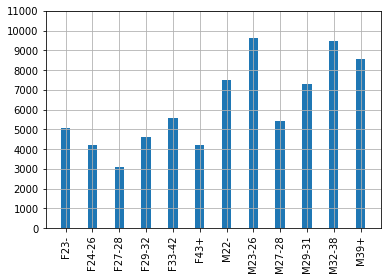

In [10]:
import matplotlib.pyplot as plt

# Read ageGroups of gender_age_train
genderAgeGroup = genderAgeTrain_df["agegroup"]
x = np.unique(genderAgeGroup)
l = list()
for e in x:
    count = 0
    for f in genderAgeGroup:
        if e == f:
            count = count + 1
    l.append(count)
y = np.array(l)
ind = np.arange(len(x))
plt.bar(ind, y, 0.35)
plt.xticks(ind, x, rotation=90)
plt.yticks(np.arange(0, 12000, 1000))
plt.grid(True)

plt.show()

### Verteilung der User über die Smartphone-Marken

1. Bestimmen Sie die Anzahl der verschiedenen Devices und die Anzahl der verschiedenen Marken in der Tabelle *phone\_brand\_device\_model*.

2. Fügen Sie dem Pandas Dataframe mit der *gender_age_train*-Tabelle eine Spalte _brand_ hinzu und schreiben Sie in diese Spalte den Markennamen des zur jeweiligen Zeile gehörenden Device.
3. Schreiben Sie den um den Markennamen erweiterten Dataframe in ein File *gender\_age\_brand\_train.csv*.
4. Bestimmmen Sie mittels der Dataframe-Methode *value_counts()* die Anzahl der Devices pro Marke. 
5. Stellen Sie diese Verteilung der Devices über die Marken für die 20 häufigsten Marken grafisch mit einem *Matplotlib-bar-chart dar.*
6. Untersuchen Sie jetzt die Verteilung der Devices über die Marken pro Gender-Age-Group. Gibt es eine Korrelation zwischen Gender-Age-Group und Häufigkeit der Marken? Überlegen sie sich eine Visualisierung, mit der eine derartige Korrelation bestätigt oder widerlegt werden kann. Implementieren Sie die Visualisierung und zeigen Sie anhand dieser Visualisierung mögliche Korrelationen zwischen Gender-Age-Group und Markenhäufigkeit. 

In [24]:
# Read brandMap.txt and create dictionary to replace chinese brand names
def replaceChineseBrandNames(dataframe):
    brandDict = {}
    resourcePath = os.getcwd()[:-17]
    file = open(os.path.join(resourcePath, "Resources/GenderAgePrediction/brandMap.txt"))
    with file as f:
        for line in f:
            if line == "\n":
                continue
            (key, val) = line.split()
            brandDict[key] = val
    for key in brandDict.keys():
        dataframe.replace(to_replace=key, value=brandDict[key], inplace=True)
    return dataframe

# Read data of phone_device_brand_model
phoneBrandDevices = pd.read_sql("SELECT device_id, phone_brand FROM phone_brand_device_model", disk_engine)

phoneBrandDevices = replaceChineseBrandNames(phoneBrandDevices)
print("Number of different devices in phone_brand_device_model:", len(set(phoneBrandDevices['device_id'])))
print("Number of different brands in phone_brand_device_model:", len(set(phoneBrandDevices['phone_brand'])))


Number of different devices in phone_brand_device_model: 186716
Number of different brands in phone_brand_device_model: 130


In [33]:
# Add column with brands to genderAgeDataFrame
deviceBrandDict = {}
index = 0
for device in phoneBrandDevices['device_id']:
    deviceBrandDict[device] = phoneBrandDevices['phone_brand'][index]
    index += 1

index = 0
brandList = []
for element in genderAgeTrain_df['device_id']:
    brandList.append(deviceBrandDict[genderAgeTrain_df['device_id'][index]])
    index += 1
genderAgeTrain_df['brand'] = brandList
display(genderAgeTrain_df)

# Save Dataframe into CSV File
resourcePath = os.path.join(os.getcwd()[:-17], "Resources/GenderAgePrediciton/gender_age_brand_train.csv")
genderAgeTrain_df.to_csv(resourcePath, sep=",", encoding="utf-8")


,device_id,agegroup,brand
0,-8076087639492063270,M32-38,xiaomi
1,-2897161552818060146,M32-38,xiaomi
2,-8260683887967679142,M32-38,xiaomi
3,-4938849341048082022,M29-31,xiaomi
4,245133531816851882,M29-31,xiaomi
5,-1297074871525174196,F24-26,OPPO
6,236877999787307864,M32-38,coolpad
7,-8098239495777311881,M32-38,xiaomi
8,176515041953473526,M32-38,vivo
9,1596610250680140042,F33-42,samsung


FileNotFoundError: [Errno 2] No such file or directory: '/Users/janniks97/Documents/DataMining/DataMiningProjects/Resources/GenderAgePrediciton/gender_age_brand_train.csv'

In [ ]:
numberDevicesBrand = genderAgeTrain_df['brand'].value_counts()

x = np.array(numberDevicesBrand.index[0:20])
y = np.array(numberDevicesBrand.values[0:20])
ind = np.arange(len(x))
plt.bar(ind, y, 0.35)
plt.xticks(ind, x, rotation=90)
plt.yticks(np.arange(0, 19000, 1000))
plt.grid(True)

plt.show()

## Spatio-Temporale Analyse des Verhaltens einzelner User

1. Wählen Sie aus der *events*-Tabelle ein Device, für das mindestens 30 events mit zugewiesenen Geokoordinaten vorliegen.
2. Stellen Sie alle Aufenthaltsorte des zu diesem Device gehörenden Users in einer *gmaps-Heatmap* dar. Informationen hierzu finden Sie in der [gmaps-Doku]( https://github.com/pbugnion/gmaps). Für den Zugriff auf gmaps benötigen Sie einen Google-API-Key (siehe [gmaps authentication](http://jupyter-gmaps.readthedocs.io/en/latest/authentication.html))
3. Clustern Sie die 2-dimensionalen Geodaten des ausgewählten Users mit dem [DBSCAN-Algorithmus von scikit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html). Die Parameter des Algorithmus sind so zu wählen, dass wesentlich unterschiedliche Orte des Users in unterschiedlichen Clustern landen.
4. Stellen Sie den zeitlichen Verlauf der Events des ausgewählten Users im unten dargestellten Stil visuell dar. Auf der horizontalen Achse ist die Zeit relativ zur Zeit des ersten Events in Sekunden dargestellt. Auf der vertikalen Achse ist die Anzahl der bisherigen Events des Users aufgetragen. Mit jedem Event wird der Wert auf der vertikalen Achse um 1 erhöht. Die Farbe der Marker im Graph gibt den Aufenthaltscluster an. Für jeden in der vorigen Teilaufgabe gefundenen Aufenthaltscluster wird eine unterschiedliche Farbe benutzt (Im Beispiel unten wurden nur 2 Cluster gefunden). Diskutieren Sie das Verhalten des Users anhand des Graphs.

![Abbildung Zeitliches Auftreten der Events](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/tempbehave.PNG "Events über der Zeit")

# Feature Extraction

Anmerkung: In den vorigen Aufgaben war das Vorgehen relativ konkret vorgegeben. In den folgenden Aufgaben sind die Vorgaben bewußt knapp gehalten. Ihre Kreativität ist gefragt.

1. Überlegen Sie sich aus welchen Merkmalen, die aus den vorhandenen Daten extrahiert werden können, möglichst gut die Gender-Age-Group vorhergesagt werden kann.
2. Extahieren Sie diese Merkmale aus den Daten für möglichst viele (mindestens 20.000) User (devices) aus der Tabelle *gender_age_train*.  

# Gender-Age-Group Prediction
1. In der vorigen Aufgabe wurde für jeden User (device) ein Merkmalsvektor berechnet. Die Menge der Merkmalsvektoren aller User aus der Tabelle *gender_age_train* bildet die Eingabe-Matrix $X$ für die Klassifikationsalgorithmen. Die Soll-Ausgabe Vektor $y$ wird durch die *gender_age_group* der User gebildet. Bringen Sie die Matrix aller Eingabevektoren in eine Form, in der
    * alle kategorialen Parameter *One-Hot*-encodiert sind [Scikit-Learn One-Hot-Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).
    * alle Merkmale eine Varianz von 1 aufweisen. Benützen Sie hierfür die [Scikit-Learn Methode scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale).
2. Teilen Sie die Datensätze in $X$ und $y$ in eine Trainings- und eine Testpartition auf - im Verhältnis $3/4$ für Training, $1/4$ für Test. 
3. Trainieren Sie mit der Trainingspartition ein [Multilayer-Perzeptron](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).
4. Testen Sie das gelernte Modell mit der Testpartition. Für die Auswertung sollte die [Accurracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) und die [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) bestimmt werden. Finden Sie eine Parametereinstellung, die zu einer möglichst guten Accuracy führt. Interpretieren Sie die Confusion Matrix.
5. Wenden Sie nun eine [5-fache Kreuzvalidierung](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) an und bestimmen Sie damit eine möglichst gute Parametereinstellung.
6. Mit welchen Parametern erzielen Sie die beste Accurracy? Wie hoch ist diese dann? Diskutieren Sie das Ergebnis.


In [ ]:
def initFeatureVector():
    allUsers = pd.read_sql_query("SELECT device_id as device, agegroup"
                                 " FROM gender_age_train"
                                 " WHERE device IN (SELECT DISTINCT device_id FROM events) LIMIT 50", disk_engine)
    return allUsers


def getDeviceBrands(allUsers):
    phoneBrandDevices = pd.read_sql_query("SELECT device_id, phone_brand FROM phone_brand_device_model", disk_engine)
    phoneBrandDevices = replaceChineseBrandNames(phoneBrandDevices)
    deviceBrandDict = dict(zip(phoneBrandDevices.device_id, phoneBrandDevices.phone_brand))
    allUsers['phoneBrand'] = np.nan
    for index, row in allUsers.iterrows():
        allUsers['phoneBrand'][index] = deviceBrandDict[allUsers['device'][index]]
    return allUsers


def getNumberOfEvents(allUsers):
    eventCount = pd.read_sql(
        "SELECT device_id as device, COUNT(device_id) as eventCount FROM events WHERE device_id IN "
        + str(tuple(allUsers.device.values))
        + " GROUP BY device",
        disk_engine)
    count_dict = dict(zip(eventCount.device, eventCount.eventCount))
    allUsers['numberOfEvents'] = 0
    for index, row in allUsers.iterrows():
        if allUsers['device'][index] in count_dict.keys():
            allUsers['numberOfEvents'][index] = count_dict[allUsers['device'][index]]
    return allUsers


def getInstalledApps(allUsers):
    allAppsLabeled = pd.read_sql("SELECT app_id as app, label_id FROM app_labels ORDER BY app", disk_engine)
    for appCategory in set(allAppsLabeled.label_id):
        allUsers[appCategory] = 0
    appLabelDict = dict(zip(allAppsLabeled.app, allAppsLabeled.label_id))
    events_df = pd.read_sql("SELECT device_id as device, event_id as event "
                            "FROM events " +
                            "WHERE device_id in " + str(tuple(allUsers.device.values)) + " ORDER BY device",
                            disk_engine)
    devices = list(set(events_df.device.values))
    deviceAppsDict = dict.fromkeys(devices)
    for device in devices:
        eventList = events_df.loc[events_df['device'] == device]['event']
        if len(eventList) > 1:
            installedApps = pd.read_sql("SELECT app_id as app FROM app_events WHERE is_installed = 1 AND event_id IN "
                                        + str(tuple(eventList)), disk_engine)
        else:
            installedApps = pd.read_sql("SELECT app_id as app FROM app_events WHERE is_installed = 1 AND event_id == "
                                        + str(list(eventList)[0]), disk_engine)
        for app in installedApps.app:
            allUsers[appLabelDict[app]][allUsers['device'] == device] += 1

    return allUsers


def encodeBrandNames(allUsers):
    brands = allUsers['phoneBrand']
    labelEncoder = LabelEncoder()
    labelEncoder.fit(brands)
    brands_as_int = labelEncoder.transform(brands)
    oneHotEncoder = OneHotEncoder(sparse=False)
    brands_as_int = brands_as_int.reshape(len(brands_as_int), 1)
    brands_encoded = oneHotEncoder.fit_transform(brands_as_int)
    brands_df = pd.DataFrame(columns=labelEncoder.classes_, data=brands_encoded)
    allUsers = allUsers.join(brands_df)
    del allUsers['phoneBrand']

    return allUsers


featureVector = initFeatureVector()
featureVector = getDeviceBrands(featureVector)
featureVector = getNumberOfEvents(featureVector)
featureVector = getInstalledApps(featureVector)
featureVector = encodeBrandNames(featureVector)